#Planning Domain Definitions and Planning Strategies

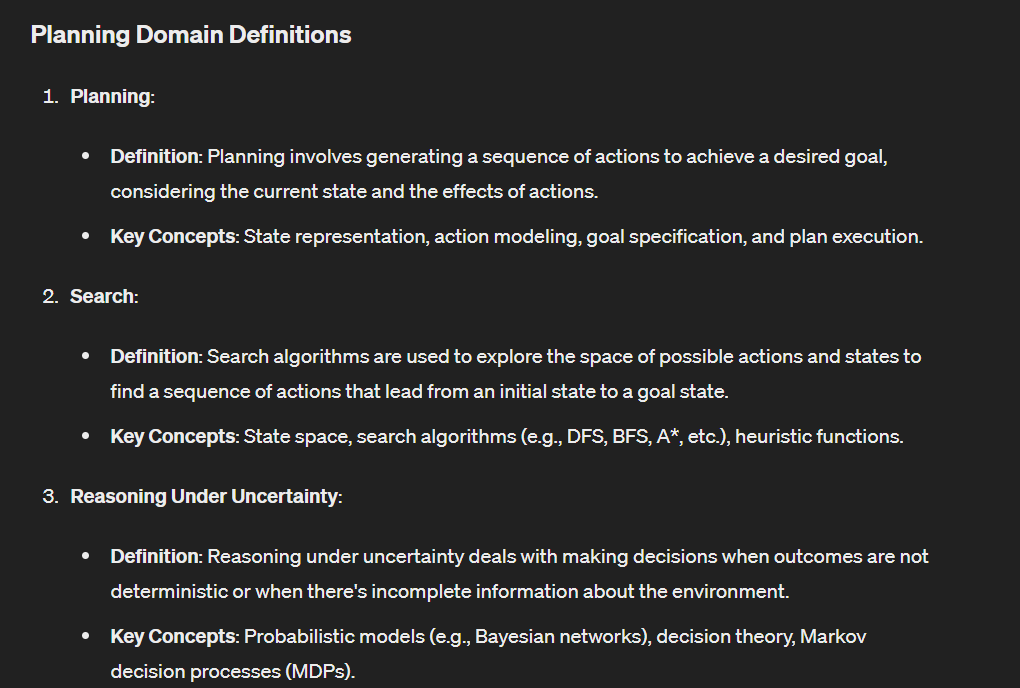

#Planning

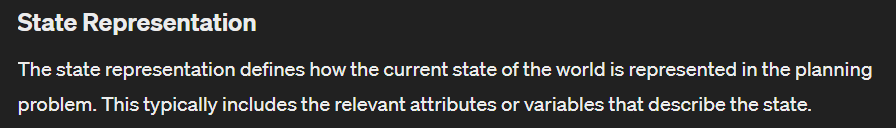

In [1]:
class State:
    def __init__(self, variables):
        self.variables = variables

    def __repr__(self):
        return f"State({self.variables})"

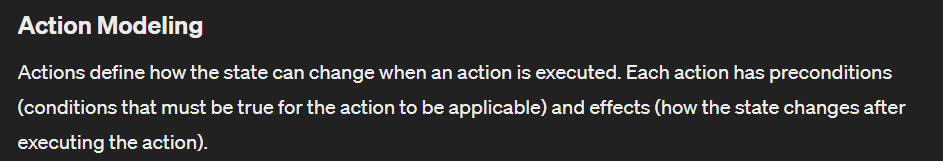

In [2]:
class Action:
    def __init__(self, name, preconditions, effects):
        self.name = name
        self.preconditions = preconditions
        self.effects = effects

    def is_applicable(self, state):
        return all(state.variables[key] == value for key, value in self.preconditions.items())

    def apply(self, state):
        if self.is_applicable(state):
            new_state_vars = state.variables.copy()
            new_state_vars.update(self.effects)
            return State(new_state_vars)
        else:
            raise ValueError(f"Action {self.name} is not applicable to the current state.")

    def __repr__(self):
        return f"Action({self.name})"

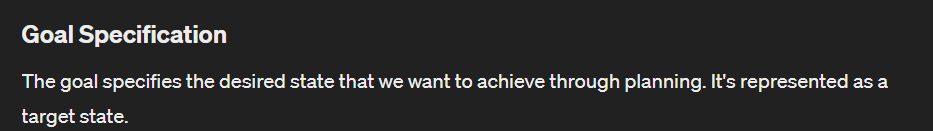

In [3]:
class Goal:
    def __init__(self, target_state):
        self.target_state = target_state

    def is_satisfied(self, state):
        return all(state.variables[key] == value for key, value in self.target_state.variables.items())

    def __repr__(self):
        return f"Goal({self.target_state})"

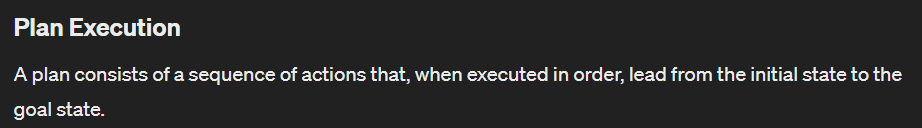

In [4]:
class Plan:
    def __init__(self, actions):
        self.actions = actions

    def execute(self, initial_state):
        current_state = initial_state
        for action in self.actions:
            current_state = action.apply(current_state)
        return current_state

    def __repr__(self):
        return f"Plan({', '.join(action.name for action in self.actions)})"

In [5]:
# Define initial state
initial_state = State({'location': 'room_A', 'has_item': False})

# Define actions
actions = [
    Action('move_to_room_B', {'location': 'room_A'}, {'location': 'room_B'}),
    Action('take_item', {'location': 'room_B', 'has_item': False}, {'has_item': True}),
    Action('move_to_room_A_with_item', {'location': 'room_B', 'has_item': True}, {'location': 'room_A', 'has_item': False})
]

# Define goal
goal_state = State({'location': 'room_B', 'has_item': True})
goal = Goal(goal_state)

# Create a plan
plan = Plan([actions[0], actions[1], actions[2]])

# Execute the plan
final_state = plan.execute(initial_state)

# Check if goal is satisfied
if goal.is_satisfied(final_state):
    print("Goal achieved!")
else:
    print("Goal not achieved.")

Goal not achieved.


#Search:

State Space Representation


In [6]:
class State:
    def __init__(self, name):
        self.name = name

    def __repr__(self):
        return f"State({self.name})"

Search Algorithms


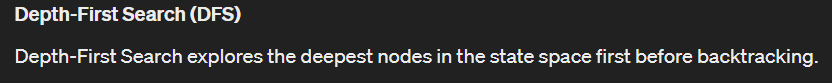

In [7]:
def dfs_search(initial_state, goal_test, successors):
    frontier = [(initial_state, [])]
    explored = set()

    while frontier:
        current_state, path = frontier.pop()

        if current_state in explored:
            continue

        explored.add(current_state)

        if goal_test(current_state):
            return path + [current_state]

        for action, next_state in successors(current_state):
            if next_state not in explored:
                frontier.append((next_state, path + [action]))

    return None

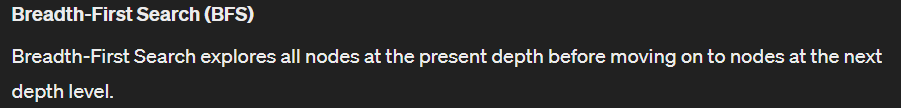

In [8]:
from collections import deque

def bfs_search(initial_state, goal_test, successors):
    frontier = deque([(initial_state, [])])
    explored = set()

    while frontier:
        current_state, path = frontier.popleft()

        if current_state in explored:
            continue

        explored.add(current_state)

        if goal_test(current_state):
            return path + [current_state]

        for action, next_state in successors(current_state):
            if next_state not in explored:
                frontier.append((next_state, path + [action]))

    return None

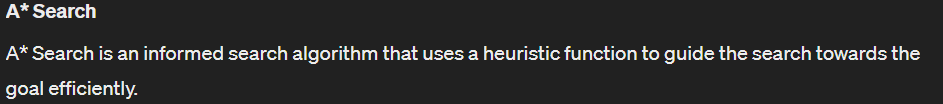

In [9]:
import heapq

def astar_search(initial_state, goal_test, successors, heuristic):
    frontier = [(heuristic(initial_state), 0, initial_state, [])]
    explored = set()

    while frontier:
        _, cost, current_state, path = heapq.heappop(frontier)

        if current_state in explored:
            continue

        explored.add(current_state)

        if goal_test(current_state):
            return path + [current_state]

        for action, next_state in successors(current_state):
            if next_state not in explored:
                next_cost = cost + 1
                heapq.heappush(frontier, (next_cost + heuristic(next_state), next_cost, next_state, path + [action]))

    return None


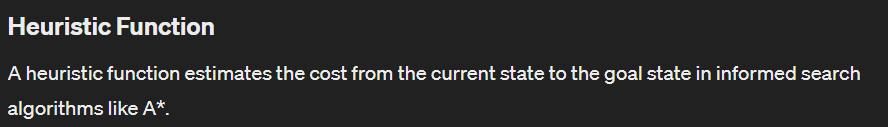

In [11]:
def heuristic(state):
    # Example heuristic (e.g., Euclidean distance to goal)
    return abs(state.name - goal_state.name)

In [12]:
# Define states and transitions
initial_state = State(1)
goal_state = State(5)

def successors(state):
    return [(f"Move to {state.name + 1}", State(state.name + 1)), (f"Move to {state.name + 2}", State(state.name + 2))]

def goal_test(state):
    return state.name == goal_state.name

# Perform search using DFS
result_dfs = dfs_search(initial_state, goal_test, successors)
print("DFS Path:", result_dfs)

# Perform search using BFS
result_bfs = bfs_search(initial_state, goal_test, successors)
print("BFS Path:", result_bfs)

# Perform search using A* with a heuristic
result_astar = astar_search(initial_state, goal_test, successors, heuristic)
print("A* Path:", result_astar)

DFS Path: ['Move to 3', 'Move to 5', State(5)]
BFS Path: ['Move to 3', 'Move to 5', State(5)]
A* Path: ['Move to 3', 'Move to 5', State(5)]


#Reasoning Under Uncertainty

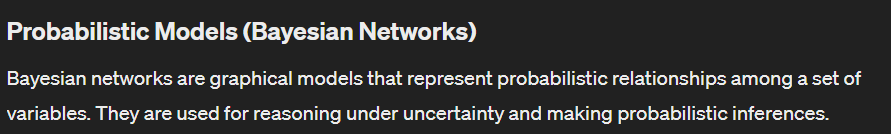

In [13]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [14]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Define the structure of the Bayesian network
model = BayesianModel([('D', 'T'), ('L', 'T')])

# Define Conditional Probability Distributions (CPDs)
cpd_d = TabularCPD(variable='D', variable_card=2, values=[[0.6], [0.4]])
cpd_l = TabularCPD(variable='L', variable_card=2, values=[[0.8], [0.2]])
cpd_t = TabularCPD(variable='T', variable_card=2,
                   values=[[0.9, 0.6, 0.7, 0.1],
                           [0.1, 0.4, 0.3, 0.9]],
                   evidence=['D', 'L'], evidence_card=[2, 2])

# Add CPDs to the model
model.add_cpds(cpd_d, cpd_l, cpd_t)

# Perform Variable Elimination for inference
infer = VariableElimination(model)

# Compute probability of T given evidence
print(infer.query(variables=['T'], evidence={'D': 1, 'L': 0}))

+------+----------+
| T    |   phi(T) |
+======+==========+
| T(0) |   0.7000 |
+------+----------+
| T(1) |   0.3000 |
+------+----------+


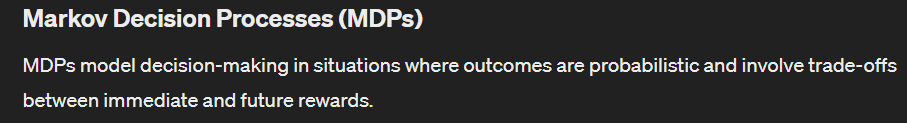

In [15]:
import numpy as np

# Define MDP parameters
num_states = 3
num_actions = 2
gamma = 0.9  # Discount factor

# Define transition probabilities (s, a, s') -> P(s' | s, a)
transition_probs = np.array([
    [[0.8, 0.2, 0.0], [1.0, 0.0, 0.0]],  # From state 0, actions 0 and 1
    [[0.0, 0.8, 0.2], [0.0, 1.0, 0.0]],  # From state 1, actions 0 and 1
    [[1.0, 0.0, 0.0], [0.8, 0.0, 0.2]]   # From state 2, actions 0 and 1
])

# Define rewards (s, a) -> R(s, a)
rewards = np.array([
    [10, 0],  # From state 0, actions 0 and 1
    [0, 0],   # From state 1, actions 0 and 1
    [0, -50]  # From state 2, actions 0 and 1
])

# Initialize value function
V = np.zeros(num_states)

# Perform value iteration to find optimal policy
num_iterations = 100
for _ in range(num_iterations):
    Q = np.zeros((num_states, num_actions))
    for s in range(num_states):
        for a in range(num_actions):
            Q[s, a] = np.sum(transition_probs[s, a] * (rewards[s, a] + gamma * V))
    V = np.max(Q, axis=1)

# Compute optimal policy
optimal_policy = np.argmax(Q, axis=1)
print("Optimal Policy:", optimal_policy)

Optimal Policy: [0 0 0]


Expected Utility Maximization: Expected Utility Maximization is a fundamental concept in decision theory, where decisions are made by maximizing the expected utility of possible outcomes. It involves defining a utility function that quantifies preferences over outcomes, and then selecting the action that yields the highest expected utility.

In [16]:
import numpy as np

# Define utility function (for demonstration purposes)
def utility(outcome):
    # Example utility function (linear utility)
    return outcome

# Define possible actions and their outcomes (utility values)
actions = ['A', 'B', 'C']
outcomes = {
    'A': [10, 5, -5],  # Possible outcomes for action A
    'B': [8, 6, -3],   # Possible outcomes for action B
    'C': [12, 4, -2]   # Possible outcomes for action C
}

# Define probabilities of uncertain events (e.g., weather conditions)
probabilities = [0.3, 0.5, 0.2]  # Corresponding to [good, moderate, bad] outcomes

# Compute expected utility for each action
expected_utilities = []
for action in actions:
    expected_utility = sum(probabilities[i] * utility(outcomes[action][i]) for i in range(len(probabilities)))
    expected_utilities.append(expected_utility)

# Determine the action with the highest expected utility
optimal_action_index = np.argmax(expected_utilities)
optimal_action = actions[optimal_action_index]
max_expected_utility = expected_utilities[optimal_action_index]

# Print results
print("Expected Utilities:")
for i, action in enumerate(actions):
    print(f"{action}: {expected_utilities[i]}")
print(f"\nOptimal Action: {optimal_action}")
print(f"Max Expected Utility: {max_expected_utility}")

Expected Utilities:
A: 4.5
B: 4.800000000000001
C: 5.199999999999999

Optimal Action: C
Max Expected Utility: 5.199999999999999
